In [1]:
library('Seurat')

library('tidyr')
library('dplyr')
library('magrittr')
library('ggplot2')
library('readr')
library('stringr')
library('tibble')

library('gghighlight')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘magrittr’

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
load('../data/all_ab-processed.Rdata')
ls()

[1] "all_ab_filtered"

In [3]:
ab_matrix <- GetAssayData(object = all_ab_filtered, slot = "data")
rownames(ab_matrix)

[1] "CD3-TotalSeqC"                      "CD19-TotalSeqC"                    
 [3] "CD45RA-TotalSeqC"                   "CD4-TotalSeqC"                     
 [5] "CD8a-TotalSeqC"                     "CD14-TotalSeqC"                    
 [7] "CD45RO-TotalSeqC"                   "PD-1-TotalSeqC"                    
 [9] "IgG1-TotalSeqC"                     "IgG2a-TotalSeqC"                   
[11] "IgG2b-TotalSeqC"                    "CD127-TotalSeqC"                   
[13] "CCR7-TotalSeqC"                     "HLA-DR-TotalSeqC"                  
[15] "VTEHDTLLY-IE-1-CMV"                 "KTWGQYWQV-gp100-Cancer"            
[17] "ELAGIGILTV-MART-1-Cancer"           "CLLWSFQTSA-Tyrosinase-Cancer"      
[19] "IMDQVPFSV-gp100-Cancer"             "SLLMWITQV-NY-ESO-1-Cancer"         
[21] "KVAELVHFL-MAGE-A3-Cancer"           "KVLEYVIKV-MAGE-A1-Cancer"          
[23] "CLLGTYTQDV-Kanamycin-B-dioxygenase" "LLDFVRFMGV-EBNA-3B-EBV"            
[25] "LLMGTLGIVC-HPV-16E7-82-91"          "CLGGLLTMV-LMP-2A-EBV"              
[27] "YLLEMLWRL-LMP1-EBV"                 "FLYALALLL-LMP2A-EBV"               
[29] "GILGFVFTL-Flu-MP-Influenza"         "GLCTLVAML-BMLF1-EBV"               
[31] "NLVPMVATV-pp65-CMV"                 "ILKEPVHGV-RT-HIV"                  
[33] "FLASKIGRLV-Ca2-indepen-Plip-A2"     "CYTWNQMNL-WT1-(235-243)236M-Y"     
[35] "RTLNAWVKV-Gag-protein-HIV"          "KLQCVDLHV-PSA146-154"              
[37] "LLFGYPVYV-HTLV-1"                   "SLFNTVATL-Gag-protein-HIV"         
[39] "SLYNTVATLY-Gag-protein-HIV"         "SLFNTVATLY-Gag-protein-HIV"        
[41] "RMFPNAPYL-WT-1"                     "YLNDHLEPWI-BCL-X-Cancer"           
[43] "MLDLQPETT-16E7-HPV"                 "KLGGALQAK-IE-1-CMV"                
[45] "RLRAEAQVK-EMNA-3A-EBV"              "RIAAWMATY-BCL-2L1-Cancer"          
[47] "IVTDFSVIK-EBNA-3B-EBV"              "AVFDRKSDAK-EBNA-3B-EBV"            
[49] "IPSINVHHY-pp65-CMV"                 "AYAQKIFKI-IE-1-CMV"                
[51] "QYDPVAALF-pp65-CMV"                 "QPRAPIRPI-EBNA-6-EBV"              
[53] "TPRVTGGGAM-pp65-CMV"                "RPPIFIRRL-EBNA-3A-EBV"             
[55] "RPHERNGFTVL-pp65-CMV"               "RAKFKQLL-BZLF1-EBV"                
[57] "ELRRKMMYM-IE-1-CMV"                 "FLRGRAYGL-EBNA-3A-EBV"             
[59] "SLEGGGLGY-NC"                       "STEGGGLAY-NC"                      
[61] "ALIAPVHAV-NC"                       "AYSSAGASI-NC"                      
[63] "GPAESAAGL-NC"                       "AAKGRGAAL-NC"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


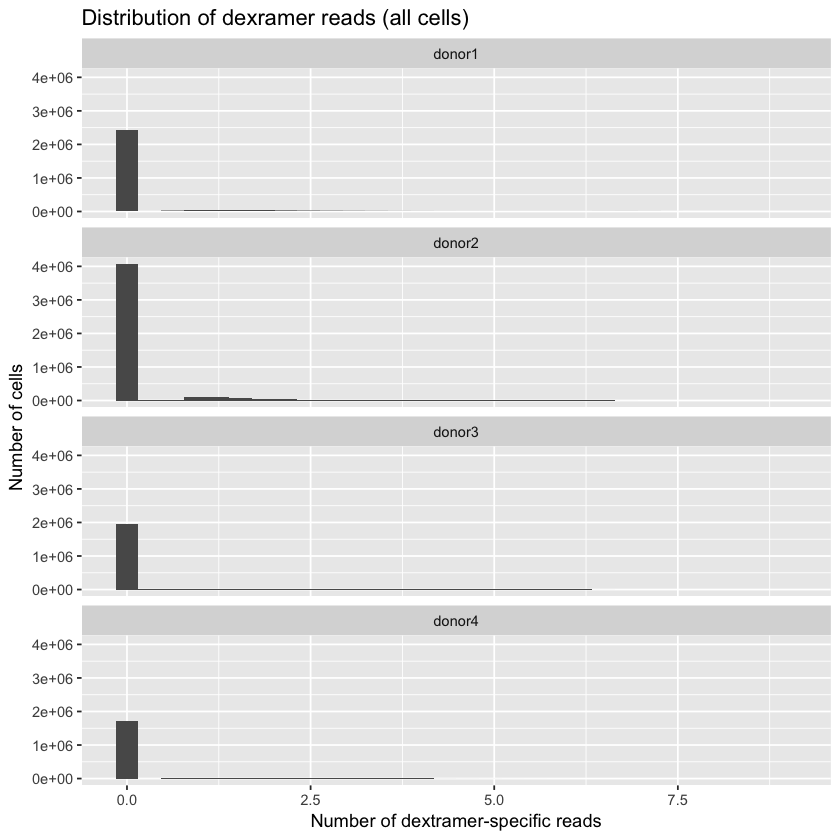

In [4]:
ab_matrix %>%
    as.matrix %>%
    t %>%
    as_tibble(rownames="barcode") %>%
    separate(`barcode`, c('donor', 'cell_barcode'), sep="_") %>%
    mutate(`donor`=factor(`donor`)) %>%
    gather(
        key=`Dextramer`,
        value=`Count`,
        factor_key=TRUE,
        'VTEHDTLLY-IE-1-CMV':'AAKGRGAAL-NC'
    ) %>%
    ggplot(aes(x=`Count`)) +
        geom_histogram() +
        facet_wrap(~`donor`, ncol=1) +
        labs(
            x='Number of dextramer-specific reads',
            y='Number of cells',
            title='Distribution of dexramer reads (all cells)'
        )



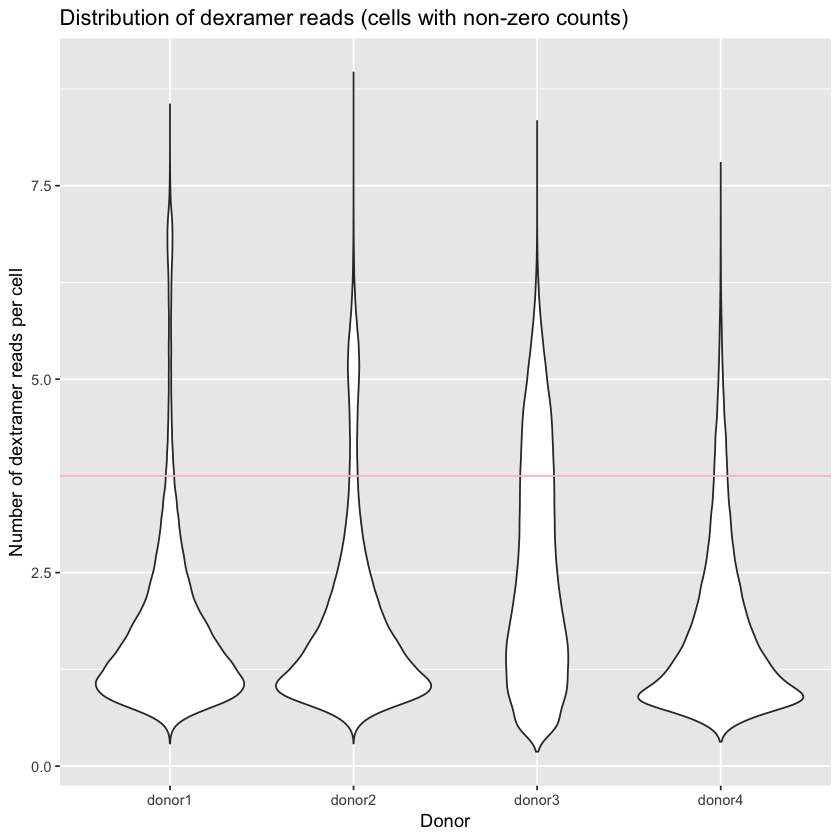

In [5]:
ab_matrix %>%
    as.matrix %>%
    t %>%
    as_tibble(rownames="barcode") %>%
    separate(`barcode`, c('donor', 'cell_barcode'), sep="_") %>%
    mutate(`donor`=factor(`donor`)) %>%
    gather(
        key=`Dextramer`,
        value=`Count`,
        factor_key=TRUE,
        'VTEHDTLLY-IE-1-CMV':'AAKGRGAAL-NC'
    ) %>%
    filter(`Count` > 0) %>%
    ggplot(aes(x=`donor`, y=`Count`)) +
        geom_violin() +
        geom_hline(yintercept=3.75, color='pink') +
        labs(
            x='Donor',
            y='Number of dextramer reads per cell',
            title='Distribution of dexramer reads (cells with non-zero counts)'
        )

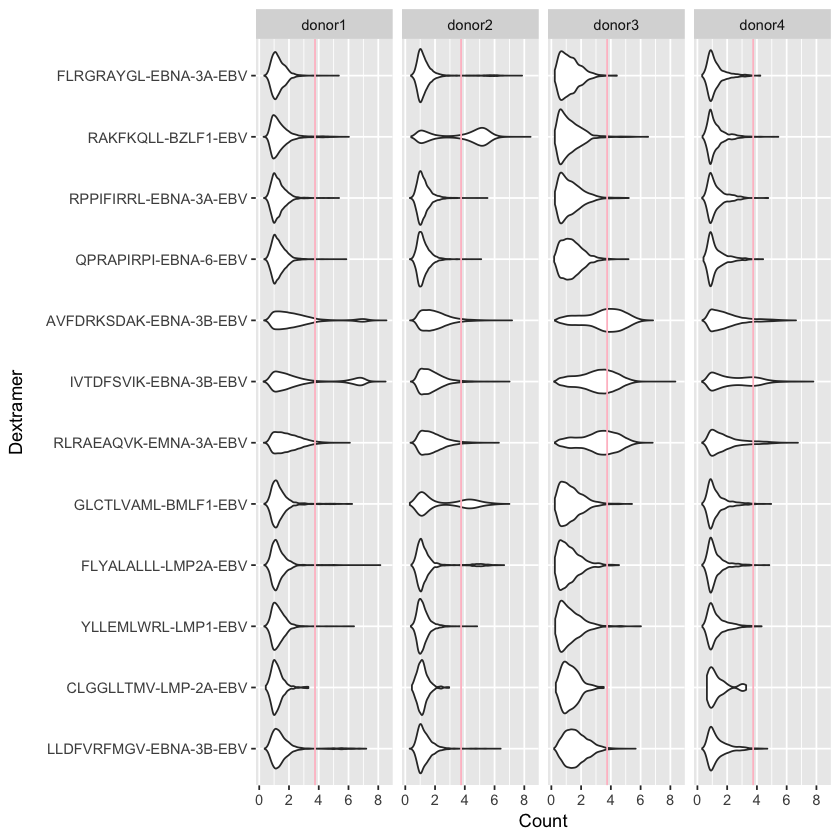

In [6]:
plot_dex <- function(strEndsWith) {
    ab_data_long <- 
        ab_matrix %>%
        as.matrix %>%
        t %>%
        as_tibble(rownames="barcode") %>%
        select(`barcode`, ends_with(strEndsWith)) %>%
        separate(`barcode`, c('donor', 'cell_barcode'), sep="_") %>%
        mutate(`donor`=factor(`donor`)) %>%
        gather(
            key=`Dextramer`,
            value=`Count`,
            factor_key=TRUE,
            ends_with(strEndsWith)
        )

    ab_data_long  %>%
        filter(`Count` > 0) %>%
        ggplot(aes(x=`Dextramer`, y=`Count`)) +
            geom_violin() +
            geom_hline(yintercept=3.75, color='pink') +
            coord_flip() +
            facet_wrap(~`donor`, ncol=4)    
}

plot_dex('EBV')

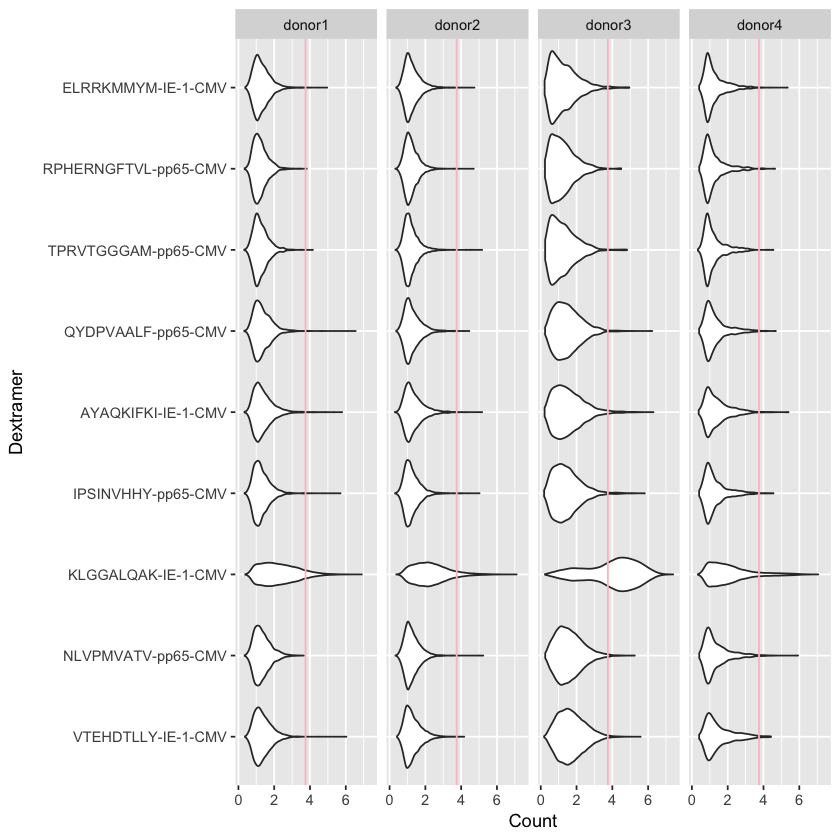

In [7]:
plot_dex('CMV')

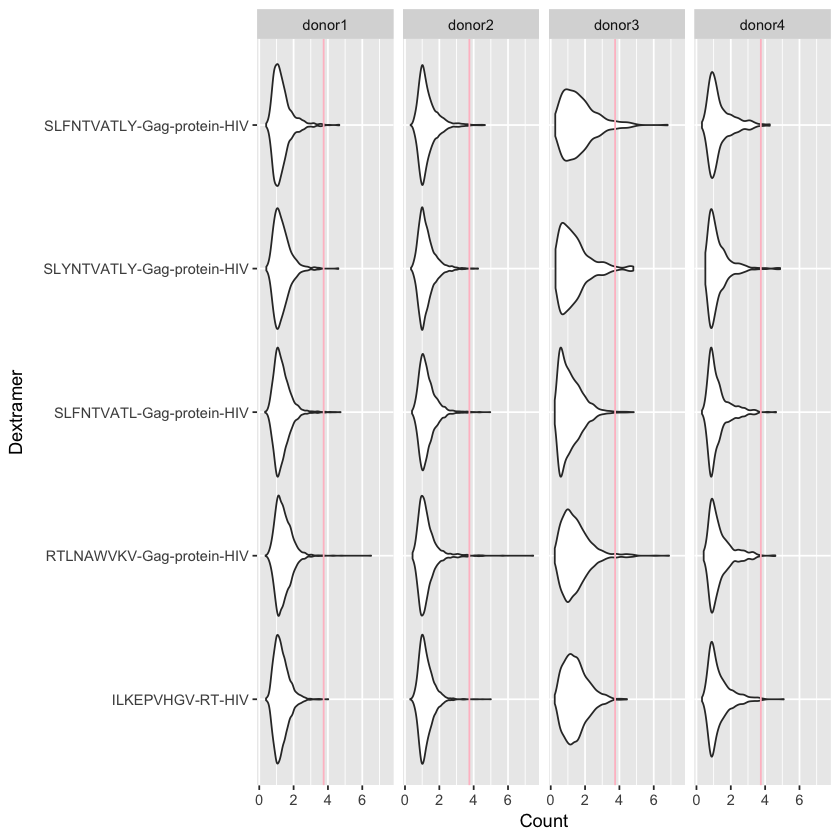

In [8]:
plot_dex('HIV')

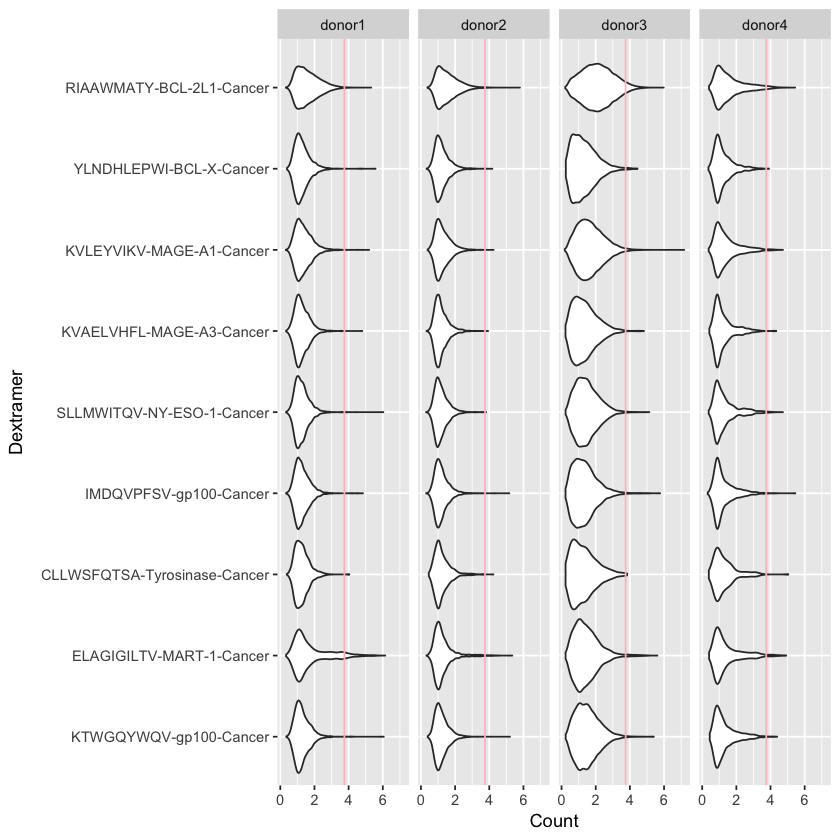

In [9]:
plot_dex('Cancer')

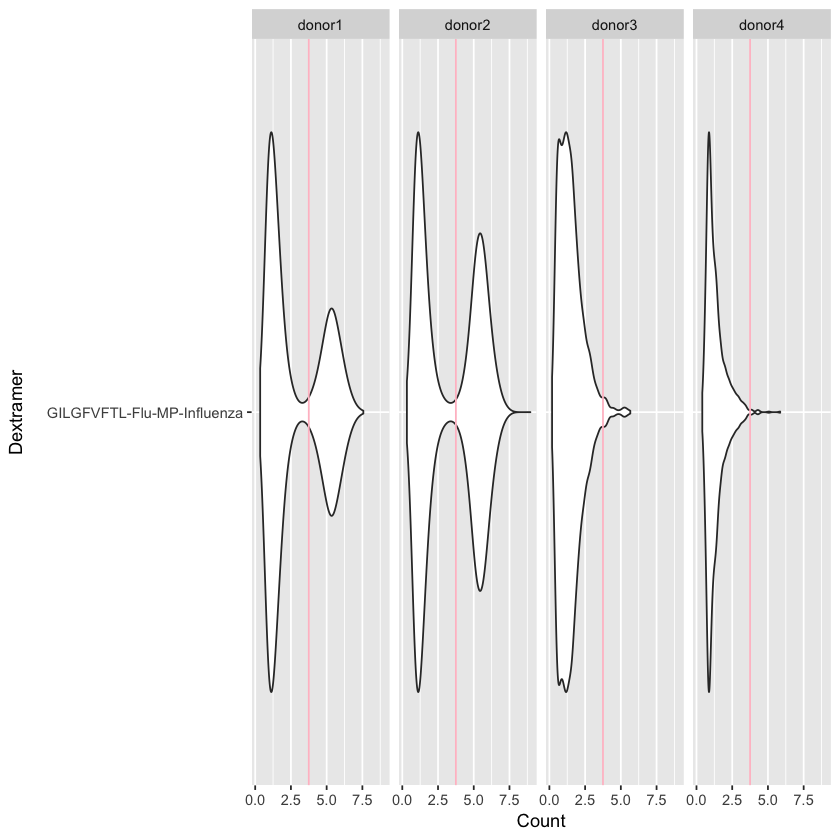

In [10]:
plot_dex('Influenza')

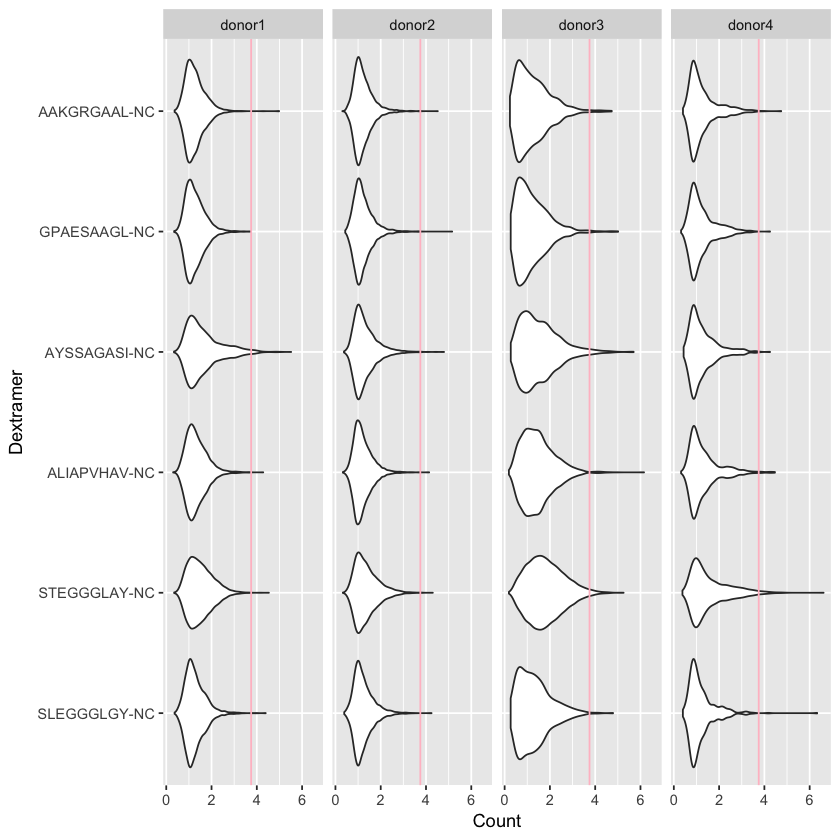

In [11]:
plot_dex('NC')

In [12]:
load('../data/all_donors.RData')
ls()

[1] "ab_matrix"       "all_ab_filtered" "all_binders"     "all_donors"     
[5] "all_features"    "all_tcrs"        "plot_dex"

In [13]:
head(all_binders)

barcode,donor,dextramer,binder
AAACCTGAGACAAAGG-4,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGACTGTAA-34,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGCCCAA-5,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGCTGCA-24,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGGGATA-8,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE
AAACCTGAGAGTGAGA-23,donor1,A0101_VTEHDTLLY_IE-1_CMV,FALSE


In [14]:
all_binders_counts <-
    ab_matrix %>%
    as.matrix %>%
    t %>%
    as_tibble(rownames="barcode") %>%
    separate(`barcode`, c('donor', 'cell_barcode'), sep="_") %>%
    mutate(`donor`=factor(`donor`)) %>%
    gather(
        key=`Dextramer`,
        value=`Count`,
        factor_key=TRUE,
        'VTEHDTLLY-IE-1-CMV':'AAKGRGAAL-NC'
    ) %>%
    select(-ends_with('TotalSeqC'))

head(all_binders_counts)

donor,cell_barcode,Dextramer,Count
donor1,AAACGGGAGAAGATTC-1,VTEHDTLLY-IE-1-CMV,1.37126
donor1,AAACGGGTCGGACAAG-1,VTEHDTLLY-IE-1-CMV,0.00000
donor1,AAAGATGGTACAGACG-1,VTEHDTLLY-IE-1-CMV,0.00000
donor1,AAAGTAGAGACGCTTT-1,VTEHDTLLY-IE-1-CMV,0.00000
donor1,AAAGTAGAGCGCTTAT-1,VTEHDTLLY-IE-1-CMV,0.00000
donor1,AAAGTAGAGTTACGGG-1,VTEHDTLLY-IE-1-CMV,0.00000


In [15]:
all_binders_merged <-
    all_binders %>%
    separate(col='dextramer', sep="_", into=c('Allele', 'Dextramer'), extra="merge", fill="right") %>%
    mutate(
        `Dextramer`=str_replace_all(`Dextramer`, "_", "-"),
        `cell_barcode`=`barcode`
    ) %>% select(-`barcode`, -`Allele`) %>%
    left_join(all_binders_counts, by=c('donor', 'Dextramer', 'cell_barcode'))
    
all_binders_merged %>% head

Warning message:
“Column `Dextramer` joining character vector and factor, coercing into character vector”

donor,Dextramer,binder,cell_barcode,Count
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGACAAAGG-4,0
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGACTGTAA-34,0
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGAGCCCAA-5,0
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGAGCTGCA-24,0
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGAGGGATA-8,0
donor1,VTEHDTLLY-IE-1-CMV,FALSE,AAACCTGAGAGTGAGA-23,0


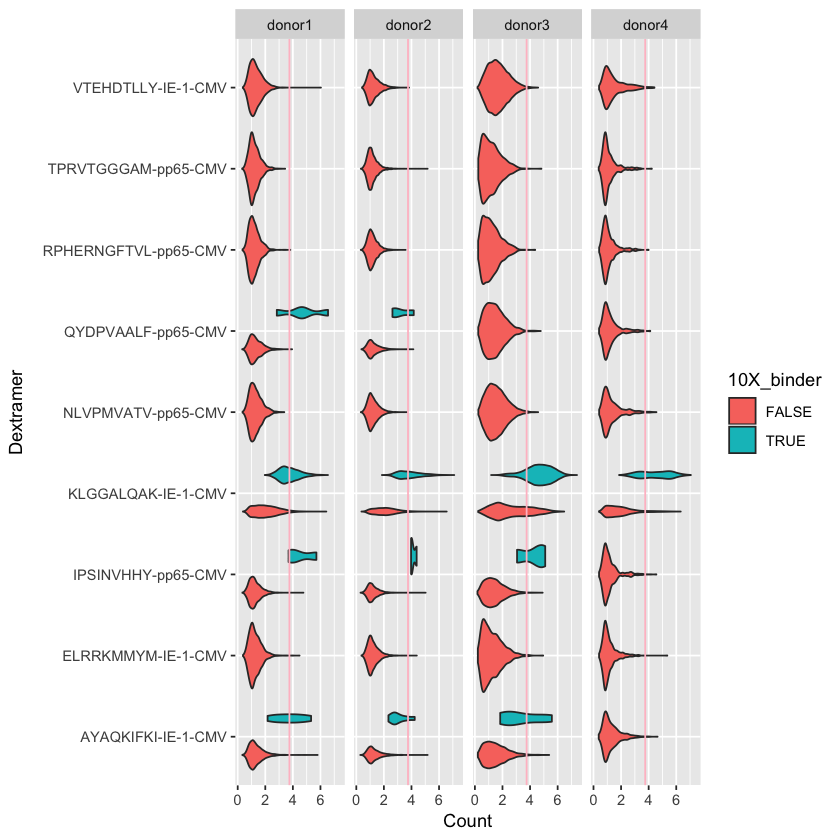

In [16]:
all_binders_merged %>%
    filter(
        endsWith(`Dextramer`, 'CMV'),
        `Count` > 0
    ) %>%
    ggplot(aes(x=`Dextramer`, y=`Count`, fill=`binder`)) +
        geom_violin() +
        geom_hline(yintercept=3.75, color="pink") +
        facet_wrap(~`donor`, ncol=4) +
        coord_flip() +
        labs(fill='10X_binder')
        

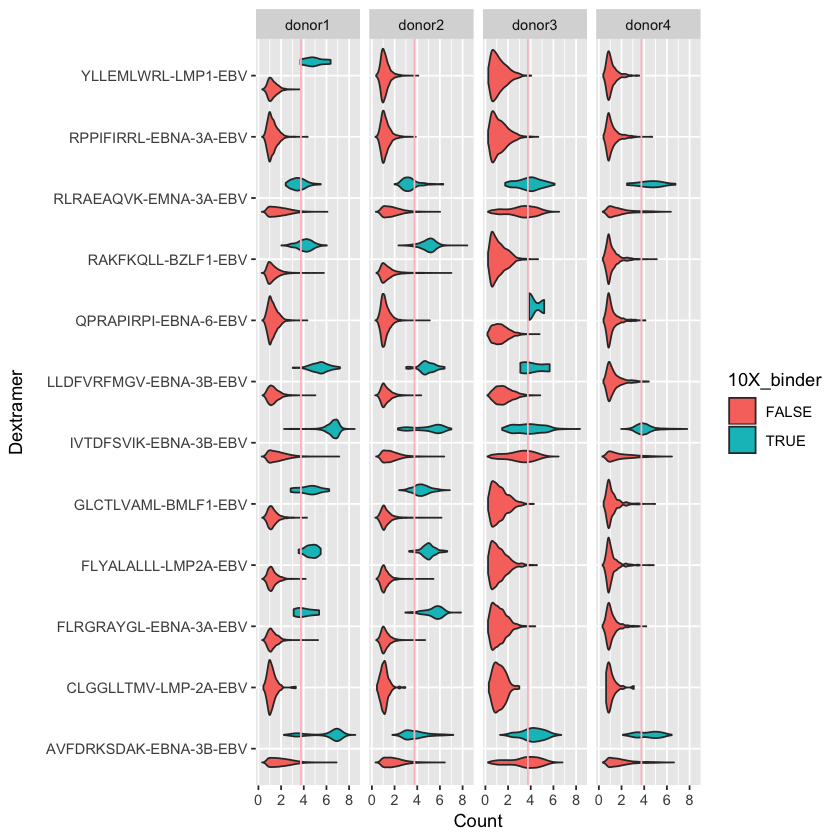

In [17]:
all_binders_merged %>%
    filter(
        endsWith(`Dextramer`, 'EBV'),
        `Count` > 0
    ) %>%
    ggplot(aes(x=`Dextramer`, y=`Count`, fill=`binder`)) +
        geom_violin() +
        geom_hline(yintercept=3.75, color="pink") +
        facet_wrap(~`donor`, ncol=4) +
        coord_flip() +
        labs(fill='10X_binder')

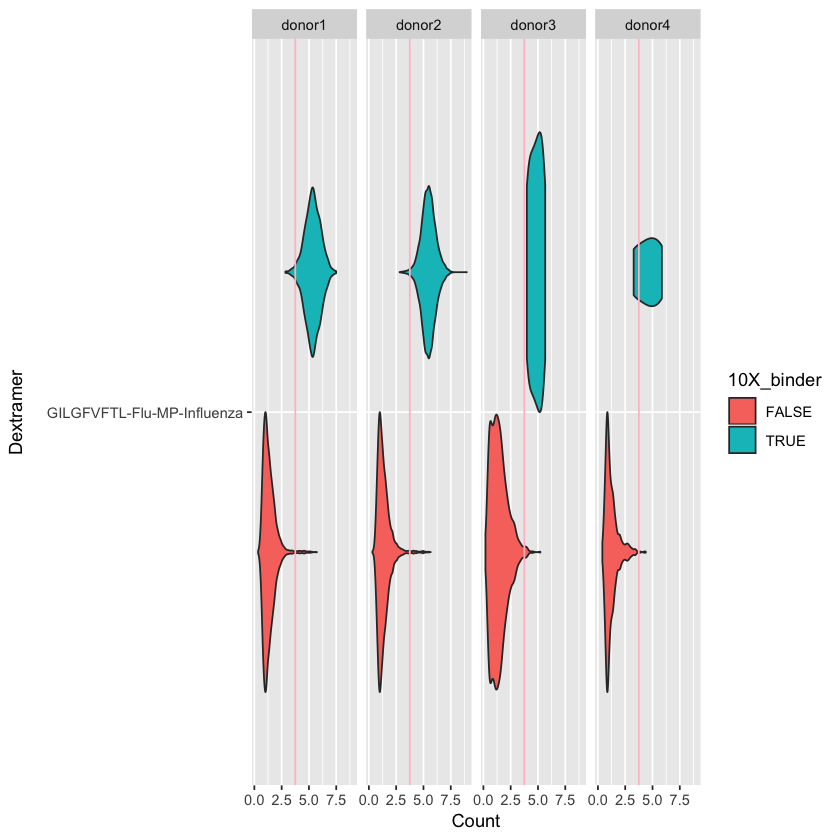

In [18]:
all_binders_merged %>%
    filter(
        endsWith(`Dextramer`, 'Influenza'),
        `Count` > 0
    ) %>%
    ggplot(aes(x=`Dextramer`, y=`Count`, fill=`binder`)) +
        geom_violin() +
        geom_hline(yintercept=3.75, color="pink") +
        facet_wrap(~`donor`, ncol=4) +
        coord_flip() +
        labs(fill='10X_binder')

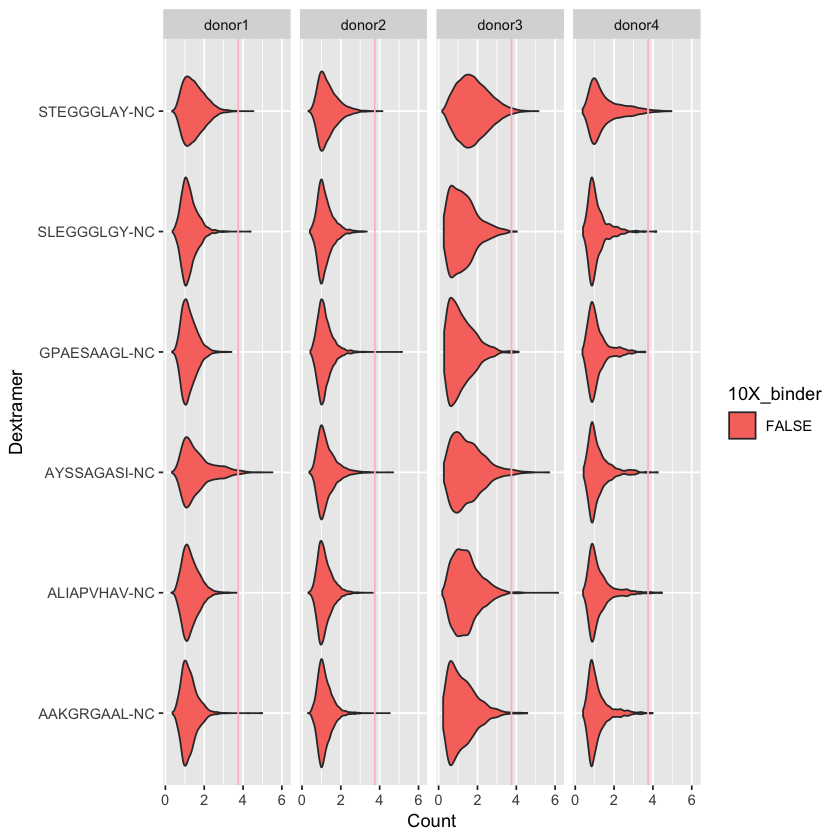

In [19]:
all_binders_merged %>%
    filter(
        endsWith(`Dextramer`, 'NC'),
        `Count` > 0
    ) %>%
    ggplot(aes(x=`Dextramer`, y=`Count`, fill=`binder`)) +
        geom_violin() +
        geom_hline(yintercept=3.75, color="pink") +
        facet_wrap(~`donor`, ncol=4) +
        coord_flip() +
        labs(fill='10X_binder')